
# SVM-Kernels

The original SVM algorithm was developed by Vladimir N Vapnik and Alexey Ya. Chervonenkis in 1963. At that time, the algorithm was in early stages. The only possibility is to draw hyperplanes for linear classifier. In 1992, Bernhard E. Boser, Isabelle M Guyon and Vladimir N Vapnik suggested a way to create non-linear classifiers by applying the kernel trick to maximum-margin hyperplanes. The current standard was proposed by Corinna Cortes and Vapnik in 1993 and published in 1995.

SVMs can be used for linear classification purposes. In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using the kernel trick. It enable us to implicitly map the inputs into high dimensional feature spaces.

Three different types of SVM-Kernels are displayed below.
The polynomial and RBF are especially useful when the
data-points are not linearly separable.

In [1]:
# Necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_moons, make_circles, make_classification

# **2. Support Vector Machines intuition** <a class="anchor" id="2"></a>


Now, we should be familiar with some SVM terminology.


### Hyperplane

A hyperplane is a decision boundary which separates between given set of data points having different class labels. The SVM classifier separates data points using a hyperplane with the maximum amount of margin. This hyperplane is known as the `maximum margin hyperplane` and the linear classifier it defines is known as the `maximum margin classifier`.


### Support Vectors

Support vectors are the sample data points, which are closest to the hyperplane.  These data points will define the separating line or hyperplane better by calculating margins.


### Margin

A margin is a separation gap between the two lines on the closest data points. It is calculated as the perpendicular distance from the line to support vectors or closest data points. In SVMs, we try to maximize this separation gap so that we get maximum margin.

The following diagram illustrates these concepts visually.


### Margin in SVM

![Margin in SVM](https://static.wixstatic.com/media/8f929f_7ecacdcf69d2450087cb4a898ef90837~mv2.png)


### SVM Under the hood

In SVMs, our main objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum margin hyperplane in the following 2 step process –


1.	Generate hyperplanes which segregates the classes in the best possible way. There are many hyperplanes that might classify the data. We should look for the best hyperplane that represents the largest separation, or margin, between the two classes.

2.	So, we choose the hyperplane so that distance from it to the support vectors on each side is maximized. If such a hyperplane exists, it is known as the **maximum margin hyperplane** and the linear classifier it defines is known as a **maximum margin classifier**.


The following diagram illustrates the concept of **maximum margin** and **maximum margin hyperplane** in a clear manner.


### Maximum margin hyperplane

![Maximum margin hyperplane](https://static.packt-cdn.com/products/9781783555130/graphics/3547_03_07.jpg)



### Problem with dispersed datasets


Sometimes, the sample data points are so dispersed that it is not possible to separate them using a linear hyperplane.
In such a situation, SVMs uses a `kernel trick` to transform the input space to a higher dimensional space as shown in the diagram below. It uses a mapping function to transform the 2-D input space into the 3-D input space. Now, we can easily segregate the data points using linear separation.


### Kernel trick - transformation of input space to higher dimensional space

![Kernel trick](http://www.aionlinecourse.com/uploads/tutorials/2019/07/11_21_kernel_svm_3.png)



## **3.1 Linear kernel**

In linear kernel, the kernel function takes the form of a linear function as follows-

**linear kernel : K(xi , xj ) = xiT xj**

Linear kernel is used when the data is linearly separable. It means that data can be separated using a single line. It is one of the most common kernels to be used. It is mostly used when there are large number of features in a dataset. Linear kernel is often used for text classification purposes.

Training with a linear kernel is usually faster, because we only need to optimize the C regularization parameter. When training with other kernels, we also need to optimize the γ parameter. So, performing a grid search will usually take more time.

Linear kernel can be visualized with the following figure.

### Linear Kernel

![Linear Kernel](https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_thumb.png)

In [2]:
#  Utility Functions
# figure number and figure size
fignum = 1
figsize = (6,5)

def plot_data(X, Y, figsize):
    plt.figure(figsize=figsize)
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
    plt.show()

def plot_decision(clf, X, Y, figsize):
    global fignum
    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=figsize)
    plt.clf()
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=70,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
    plt.axis('tight')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 1000)
    yy = np.linspace(ylim[0], ylim[1], 1000)
    YY, XX = np.meshgrid(yy, xx)
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=figsize)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])
    fignum = fignum + 1
    plt.show()

# Linearly Separable Data

Automatically created module for IPython interactive environment
Datapoints plot


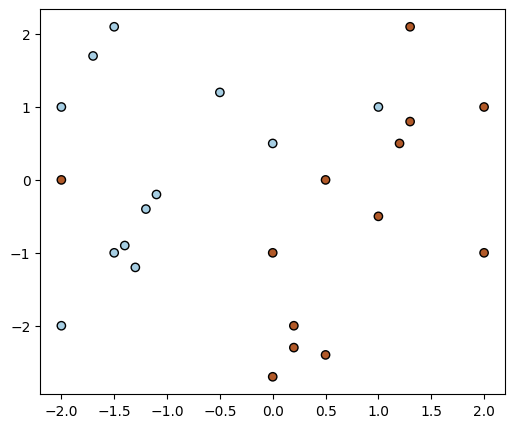



For C = 1000


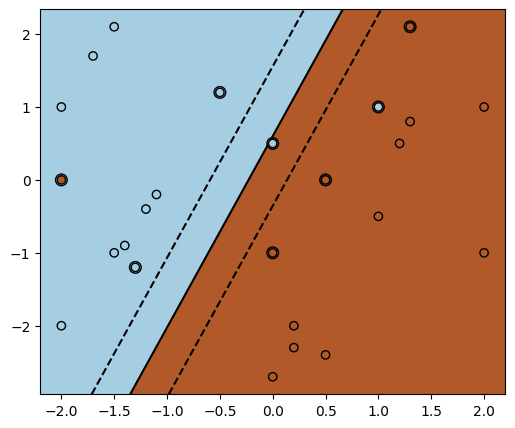



For C = 100


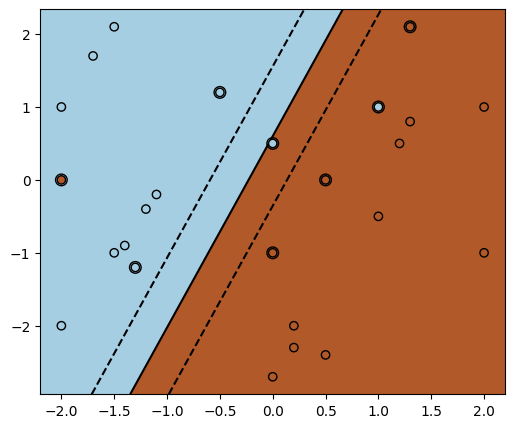



For C = 10


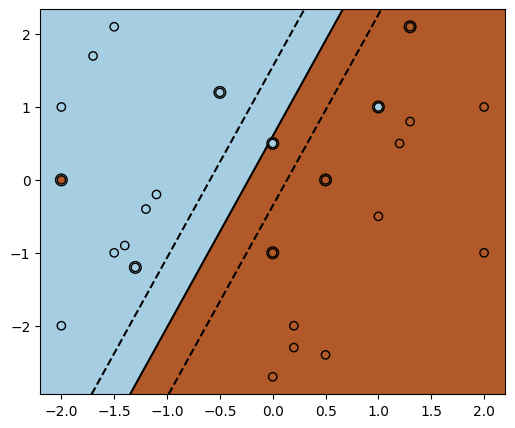



For C = 1


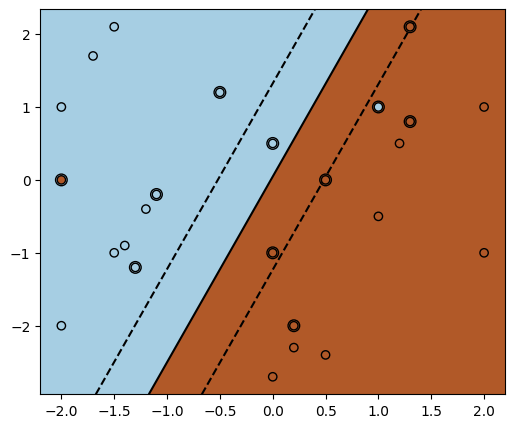



For C = 0.1


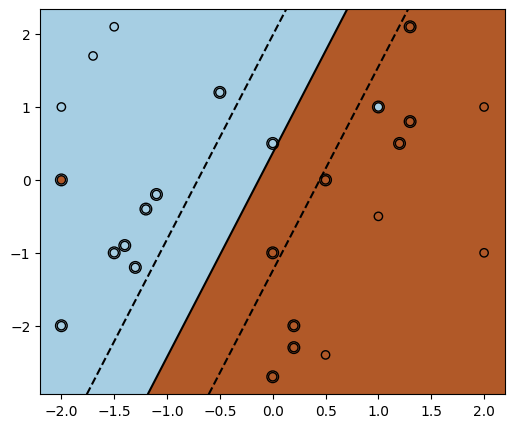



For C = 0.01


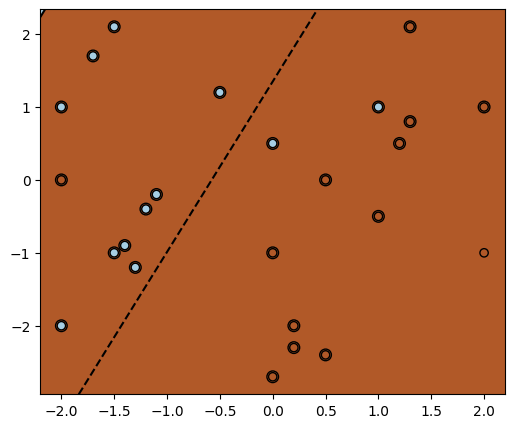



For C = 0.001


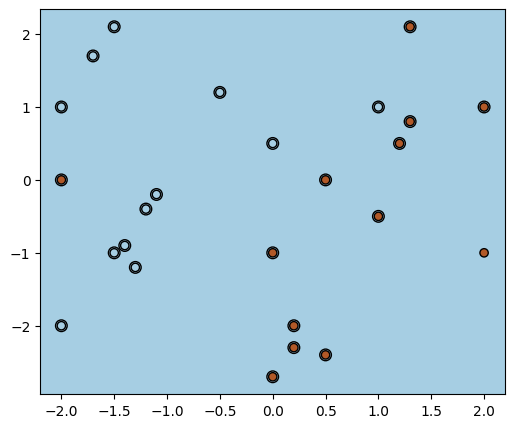

In [3]:
print(__doc__)

# Code source: Gaël Varoquaux
# License: BSD 3 clause

# Our dataset and targets
X = np.c_[#(.4, -.7),     # outlier
          (-1.5, -1),
          (-1.4, -.9),
          (-1.3, -1.2),
          (-1.1, -.2),
          (-1.2, -.4),
          (-.5, 1.2),
          (0, 0.5),
          (-1.5, 2.1),
          (-2, 1),
          (-2, -2),
          (-1.7, 1.7),
          (1, 1),       # outlier
          # --
          (1.3, .8),
          (1.2, .5),
          (.2, -2),
          (0.5, 0),
          (0, -1),
          (.5, -2.4),
          (1, -0.5),
          (.2, -2.3),
          (2, -1),
          (2, 1),
          (-2, 0),     # outlier
          (0, -2.7),
          (1.3, 2.1)].T

Y = [0] * 12 + [1] * 13

print('Datapoints plot')
plot_data(X, Y, figsize)

# fit the model
for C in (1000, 100, 10, 1, 0.1, 0.01, 0.001):
    print('\n===================================================================\n')
    print('For C = {}'.format(C))
    clf_linear = SVC(kernel='linear', C=C)
    clf_linear.fit(X, Y)
    plot_decision(clf_linear, X, Y, figsize)

# **3. Kernel trick** <a class="anchor" id="3"></a>



In practice, SVM algorithm is implemented using a `kernel`. It uses a technique called the `kernel trick`. In simple words, a `kernel` is just a function that maps the data to a higher dimension where data is separable. A kernel transforms a low-dimensional input data space into a higher dimensional space. So, it converts non-linear separable problems to linear separable problems by adding more dimensions to it. Thus, the kernel trick helps us to build a more accurate classifier. Hence, it is useful in non-linear separation problems.

In the context of SVMs, there are 4 popular kernels – `Linear kernel`,`Polynomial kernel`,`Radial Basis Function (RBF) kernel` (also called Gaussian kernel) and `Sigmoid kernel`. These are described below -

## **3.2 Polynomial Kernel**

Polynomial kernel represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables. The polynomial kernel looks not only at the given features of input samples to determine their similarity, but also combinations of the input samples.

For degree-d polynomials, the polynomial kernel is defined as follows –

**Polynomial kernel : K(xi , xj ) = (γxiT xj + r)d , γ > 0**

Polynomial kernel is very popular in Natural Language Processing. The most common degree is d = 2 (quadratic), since larger degrees tend to overfit on NLP problems. It can be visualized with the following diagram.

### Polynomial Kernel

![Polynomial Kernel](https://www.researchgate.net/profile/Cheng_Soon_Ong/publication/23442384/figure/fig12/AS:341444054274063@1458418014823/The-effect-of-the-degree-of-a-polynomial-kernel-The-polynomial-kernel-of-degree-1-leads.png)

## **3.3 Radial Basis Function Kernel**

Radial basis function kernel is a general purpose kernel. It is used when we have no prior knowledge about the data. The RBF kernel on two samples x and y is defined by the following equation –


### Radial Basis Function kernel

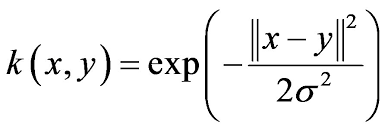

## **3.4 Sigmoid kernel**

Sigmoid kernel has its origin in neural networks. We can use it as the proxy for neural networks. Sigmoid kernel is given by the following equation –

**sigmoid kernel : k (x, y) = tanh(αxTy + c)**
    

Sigmoid kernel can be visualized with the following diagram-

### Sigmoid kernel

![Sigmoid kernel](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTKeXbOIlniBXYwMYlEYLKPwZZg8vFU1wVm3RWMACjVcT4iBVDy&s)

# Not Linearly Separable Data

In [4]:
# Initializing dataset from csv
from google.colab import files
uploaded = files.upload()



In [5]:
import io
#data = pd.read_csv(io.BytesIO(uploaded['datac.csv',' ','(1).csv']))
# Dataset is now stored in a Pandas Dataframe
#X = np.column_stack((data.x1, data.x2))
#Y = data.y

X ,Y = make_moons(noise=0.3, random_state=0)
#data = make_circles(noise=0.2, factor=0.5, random_state=1)
#data = linearly_separable

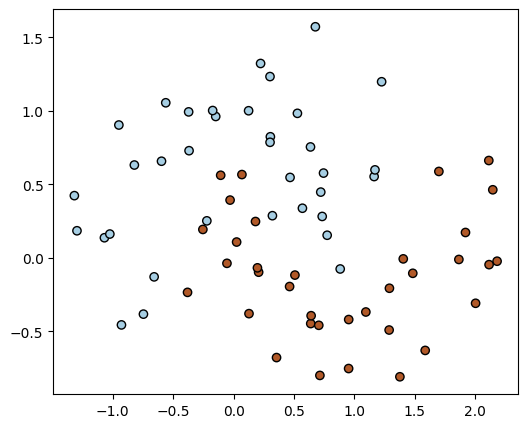

In [6]:
# Features and Target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

plot_data(X_train, Y_train, figsize)

For degree = 5, gamma = 1, C = 1


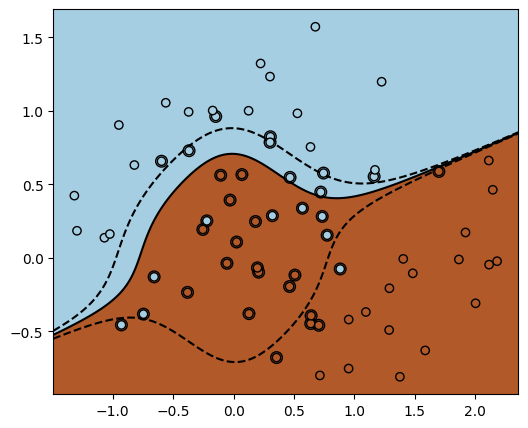

In [7]:
# Polynomial Kernel
#======================================================
# Setting the Degree of the polynomial
d = 5

# Setting the coefficient of the kernel i.e., gamma value
g = 1

# Setting the regularization parameter C
C = 1

# fit the model
print('For degree = {}, gamma = {}, C = {}'.format(d,g,C))
clf_poly = SVC(kernel='poly', degree=d, gamma=g, C=C)
clf_poly.fit(X_train, Y_train)
plot_decision(clf_poly, X_train, Y_train, figsize)
print("Confusion Matrix Train")
print(confusion_matrix(Y_train, clf_poly.predict(X_train)))
print("Confusion Matrix Test")
print(confusion_matrix(Y_test, clf_poly.predict(X_test)))
print("Accuracy Scores Train")
print(accuracy_score(Y_train, clf_poly.predict(X_train)))
print("Accuracy Scores Test")
print(accuracy_score(Y_test, clf_poly.predict(X_test)))

Confusion Matrix Train
[[26  9]
 [ 0 35]]
Confusion Matrix Test
[[12  3]
 [ 0 15]]
Accuracy Scores Train
0.8714285714285714
Accuracy Scores Test
0.9
For gamma = 1, C = 100


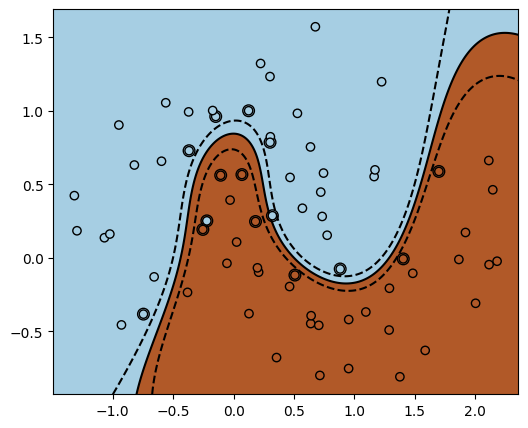

Confusion Matrix Train
[[34  1]
 [ 0 35]]
Confusion Matrix Test
[[14  1]
 [ 0 15]]
Accuracy Scores Train
0.9857142857142858
Accuracy Scores Test
0.9666666666666667


In [8]:
# Radial Basis Function (RBF) or Gaussian Kernel
#======================================================
# Setting the coefficient of the kernel i.e., gamma value
g = 1

# Setting the regularization parameter C
C = 100

# fit the model
print('For gamma = {}, C = {}'.format(g,C))
clf_rbf = SVC(kernel='rbf', gamma=g, C=C)
clf_rbf.fit(X_train, Y_train)
plot_decision(clf_rbf, X_train, Y_train, figsize)
print("Confusion Matrix Train")
print(confusion_matrix(Y_train, clf_rbf.predict(X_train)))
print("Confusion Matrix Test")
print(confusion_matrix(Y_test, clf_rbf.predict(X_test)))
print("Accuracy Scores Train")
print(accuracy_score(Y_train, clf_rbf.predict(X_train)))
print("Accuracy Scores Test")
print(accuracy_score(Y_test, clf_rbf.predict(X_test)))

# Find best initial hyperparameters using Grid Search

In [9]:
C_range = [1e-2, 1e-1, 1, 1e1, 1e2]
gamma_range = [1e-1, 1, 1e1]
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, Y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10.0, 'gamma': 1} with a score of 0.95


### References:
Notebook Theory data taken from https://www.kaggle.com/prashant111/svm-classifier-tutorial

https://en.wikipedia.org/wiki/Support-vector_machine

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

http://dataaspirant.com/2017/01/13/support-vector-machine-algorithm/

https://www.ritchieng.com/machine-learning-evaluate-classification-model/

https://en.wikipedia.org/wiki/Kernel_method

https://en.wikipedia.org/wiki/Polynomial_kernel

https://en.wikipedia.org/wiki/Radial_basis_function_kernel

https://data-flair.training/blogs/svm-kernel-functions/